In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta, datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, inspect

In [4]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

inspector = inspect(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

Recent = session.query(Measurement).order_by(desc(Measurement.date)).first()

Recent = Recent.date

print(Recent)

2017-08-23


[('2017-08-23', 0.0), ('2017-08-23', 0.0), ('2017-08-23', 0.08), ('2017-08-23', 0.45), ('2017-08-22', 0.0), ('2017-08-22', 0.0), ('2017-08-22', 0.5), ('2017-08-21', 0.0), ('2017-08-21', 0.02), ('2017-08-21', None), ('2017-08-21', 0.56), ('2017-08-20', 0.0), ('2017-08-20', 0.01), ('2017-08-20', None), ('2017-08-19', 0.0), ('2017-08-19', 0.0), ('2017-08-19', None), ('2017-08-19', 0.09), ('2017-08-18', 0.0), ('2017-08-18', 0.0), ('2017-08-18', 0.06), ('2017-08-18', None), ('2017-08-17', 0.0), ('2017-08-17', 0.05), ('2017-08-17', 0.01), ('2017-08-17', 0.13), ('2017-08-16', 0.0), ('2017-08-16', 0.07), ('2017-08-16', 0.12), ('2017-08-16', 0.42), ('2017-08-15', 0.02), ('2017-08-15', 0.0), ('2017-08-15', 0.06), ('2017-08-15', 0.32), ('2017-08-15', 0.42), ('2017-08-14', 0.0), ('2017-08-14', 0.01), ('2017-08-14', 0.08), ('2017-08-14', 0.0), ('2017-08-14', 0.22), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-13', 0.0), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-12', 0.0), ('2017-

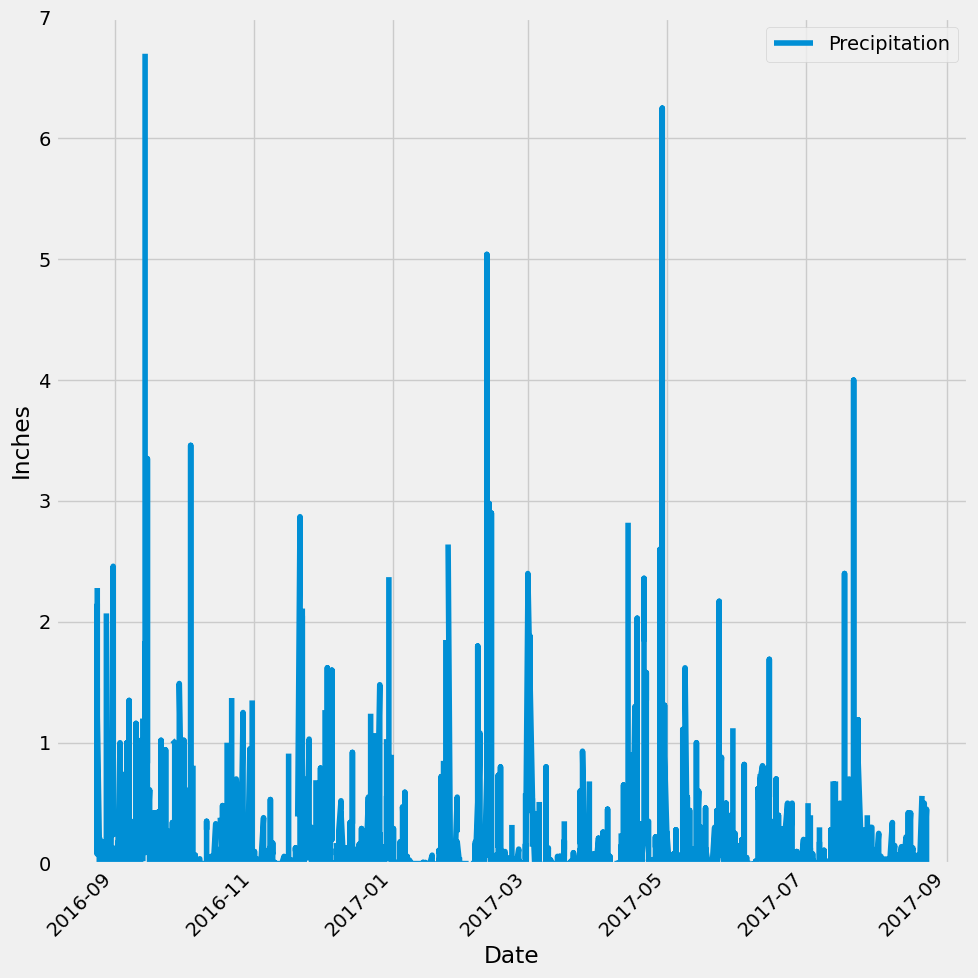

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

Twelve_months = datetime.strptime(Recent, '%Y-%m-%d') - timedelta(days=365)

Precip_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Twelve_months).order_by(desc(Measurement.date)).all()

print(Precip_query)

# Save the query results as a Pandas DataFrame. Explicitly set the column name

df = pd.DataFrame(Precip_query, columns = {'Date' : 'date', 'Precipitation' : 'prcp'})

df.set_index("Date", inplace=True)

df

# # # Sort the dataframe by date

df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

# # Use Pandas Plotting with Matplotlib to plot the data

Precipitation_plot = df.plot(figsize=(10,10), ylim=(0,7), rot=45)

Precipitation_plot.set_ylabel('Inches')

Precipitation_plot.set_xlabel('Date')

plt.tight_layout()

plt.savefig("Resources/precipitation_bar.png")

plt.show()




In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset

session.query(Station.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

Active_hawaii_stations = session.query(Measurement.station, func.count(Measurement.station).label('station_count')).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print(Active_hawaii_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Define the station i want data for

Most_Active_station = 'USC00519281'

# Execute functions on specific station

Temp_stats = session.query(func.min(Measurement.tobs).label('Lowest Temp'), func.max(Measurement.tobs).label('Highest Temp'), func.avg(Measurement.tobs).label('Average Temp')).\
filter(Measurement.station == Most_Active_station).first()

print(Temp_stats)



(54.0, 85.0, 71.66378066378067)


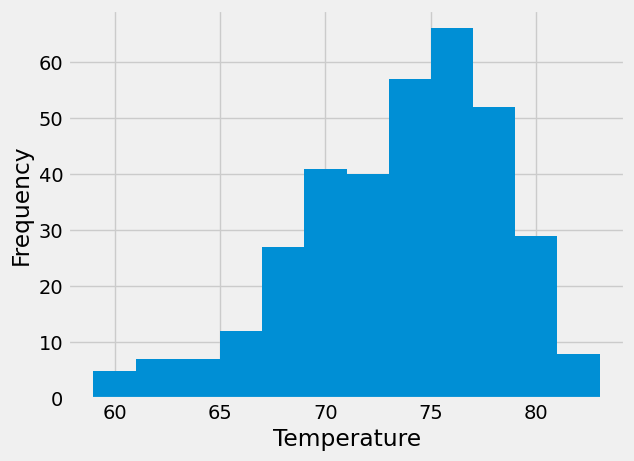

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Gather relevent data for station USC00519281'

Tobs_station = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date > '2016-08-23')\
    .filter(Measurement.date <= '2017-08-23')\
    .filter(Measurement.station == "USC00519281").all()

Tobs_station

# Convert to a DataFrame and the a Histograph

Station_df = pd.DataFrame(Tobs_station, columns=["Station", "TOBS"])

Station_df

Station_df["TOBS"].hist(bins=12)

plt.xlabel("Temperature")

plt.ylabel("Frequency")

plt.savefig("Resources/histogram_tobs.png")

plt.show()


# Close Session

In [16]:
# Close Session
session.close()